#**PART A**

#**1. Download the dataset files, load them, and prepare the dataset for analysis.**

Anomaly-based intrusion detection systems (IDS) and intrusion prevention systems (IPS) play a crucial role in defending against cyberattacks. However, the effectiveness of these systems can be hindered by a lack of reliable testing and validation datasets for evaluating their performance.

The CICIDS2017 dataset addresses this challenge by providing a collection of benign and common attack data, closely resembling real-world scenarios. The dataset includes network traffic analysis results using CICFlowMeter, with tagged flows based on various parameters such as timestamp, source and destination IP, ports, protocol, and the type of attack (available in CSV format). Additionally, the dataset provides definitions for the extracted features.



In [48]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

import torch



In [49]:
Monday = pd.read_csv('/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
columns = [i.strip() for i in Monday.columns.to_list()]
Monday.columns =  columns

Monday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [50]:
Monday['Label'].value_counts()


BENIGN    529918
Name: Label, dtype: int64

In [51]:
len(columns)

79

In [52]:
Tuesday = pd.read_csv('/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
Tuesday.columns = columns

Tuesday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [53]:
Tuesday['Label'].value_counts()

BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name: Label, dtype: int64

In [54]:
Wednesday = pd.read_csv('/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
Wednesday.columns = columns

Wednesday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [55]:
Wednesday['Label'].value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: Label, dtype: int64

In [56]:
WorkingHours_Afternoon = pd.read_csv('/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')

WorkingHours_Afternoon.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [57]:
WorkingHours_Morning = pd.read_csv('/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
Thursday = pd.concat([WorkingHours_Afternoon , WorkingHours_Morning])
Thursday.columns = columns

Thursday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [58]:
Thursday['Label'].value_counts()

BENIGN                        456752
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Name: Label, dtype: int64

In [59]:
#Friday：benign + Botnet + PortScan + Dos

In [60]:
df_DDos = pd.read_csv('/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.csv')

In [61]:
df_Botnet = pd.read_csv('/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')

In [62]:
df_PortScan = pd.read_csv('/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.csv')


Friday = pd.concat([df_DDos, df_PortScan, df_Botnet])
Friday.columns = columns

Friday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


#2) Perform four (4) data exploration tasks.

Task 1

In [63]:
#Comparison between benign and malicious data features
PortScan_data = Friday[Friday['Label'] == "PortScan"]

# Calculate the mean of each column
PortScan_mean_values = PortScan_data.mean()

PortScan_mean_values

Destination Port                8624.460177
Flow Duration                  82820.228371
Total Fwd Packets                  1.017580
Total Backward Packets             1.004958
Total Length of Fwd Packets        1.089171
                                   ...     
Active Min                        64.631548
Idle Mean                      79628.430913
Idle Std                          61.374792
Idle Max                       79763.081388
Idle Min                       79600.116561
Length: 78, dtype: float64

In [64]:
#Task 2

In [65]:
FTP_Patator = Tuesday[Tuesday['Label'] == "FTP-Patator"]
# Calculate the mean of each column
FTP_mean_Patator = FTP_Patator.mean()
FTP_mean_Patator

Destination Port               2.100743e+01
Flow Duration                  4.513245e+06
Total Fwd Packets              5.496977e+00
Total Backward Packets         7.808390e+00
Total Length of Fwd Packets    6.003212e+01
                                   ...     
Active Min                     0.000000e+00
Idle Mean                      0.000000e+00
Idle Std                       0.000000e+00
Idle Max                       0.000000e+00
Idle Min                       0.000000e+00
Length: 78, dtype: float64

Task3

In [66]:
xss_data = Thursday[Thursday['Label'] == "Web Attack � XSS"]
# Calculate the mean of each column
xss_mean_data = xss_data.mean()
xss_mean_data


Destination Port               8.000000e+01
Flow Duration                  6.715357e+06
Total Fwd Packets              7.903374e+00
Total Backward Packets         3.573620e+00
Total Length of Fwd Packets    1.197620e+03
                                   ...     
Active Min                     0.000000e+00
Idle Mean                      0.000000e+00
Idle Std                       0.000000e+00
Idle Max                       0.000000e+00
Idle Min                       0.000000e+00
Length: 78, dtype: float64

**Task** 4

In [39]:
# Filter out data with the "BENIGN" tag
benign_data = Friday[Friday['Label'] == "BENIGN"]
# Calculate the mean of each column
benign_mean_values = benign_data.mean()
benign_mean_values

Destination Port               1.009772e+04
Flow Duration                  1.266508e+07
Total Fwd Packets              9.645155e+00
Total Backward Packets         1.108612e+01
Total Length of Fwd Packets    9.270403e+02
                                   ...     
Active Min                     7.549186e+04
Idle Mean                      4.804322e+06
Idle Std                       7.061899e+05
Idle Max                       5.308728e+06
Idle Min                       4.259925e+06
Length: 78, dtype: float64

**Plotting Mean Values for Different Traffic Types**

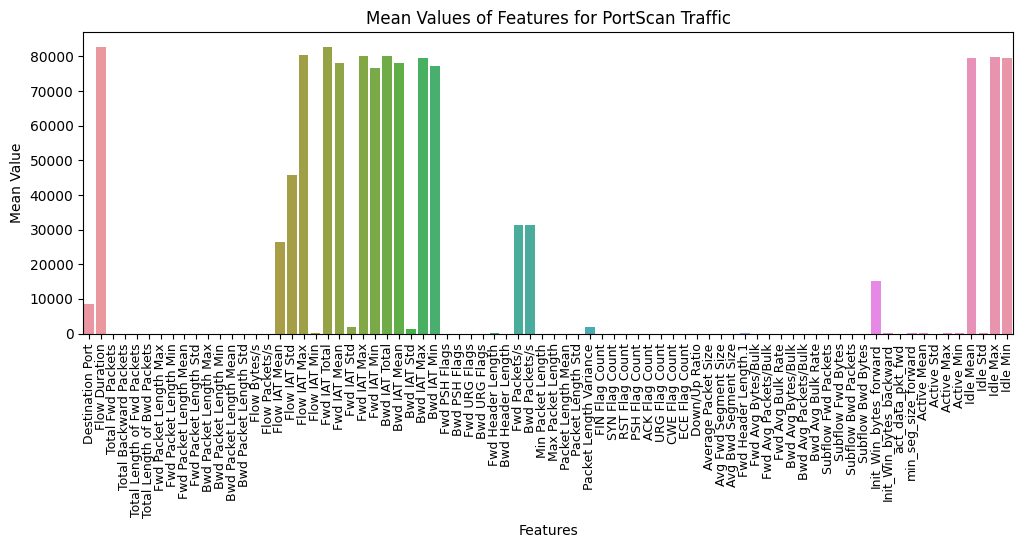

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size
fig = plt.figure(figsize=(12, 18))

# Create the first subplot
ax1 = fig.add_subplot(4, 1, 1)
sns.barplot(x=PortScan_mean_values.index, y=PortScan_mean_values.values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=9)
ax1.set_xlabel("Features")
ax1.set_ylabel("Mean Value")
ax1.set_title("Mean Values of Features for PortScan Traffic")

# Display the first subplot
plt.show()


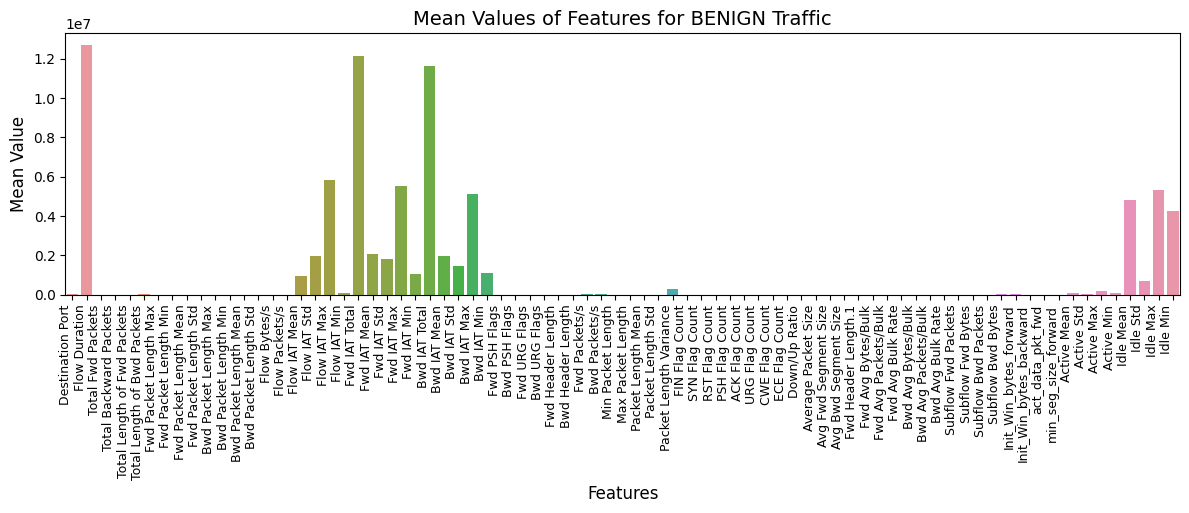

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Create a second subplot
plt.subplot(2, 1, 2)  # 2 rows and one column layout, second subplot

# Use a Seaborn color palette for the bar plot
sns.set_palette("viridis")

# Create a bar plot
sns.barplot(x=benign_mean_values.index, y=benign_mean_values.values)
plt.xticks(rotation=90, ha='right', fontsize=9)  # Rotate x-axis labels for better readability
plt.xlabel("Features", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.title("Mean Values of Features for BENIGN Traffic", fontsize=14)


# Adjust layout to avoid overlap
plt.tight_layout()

# Show the graph
plt.show()


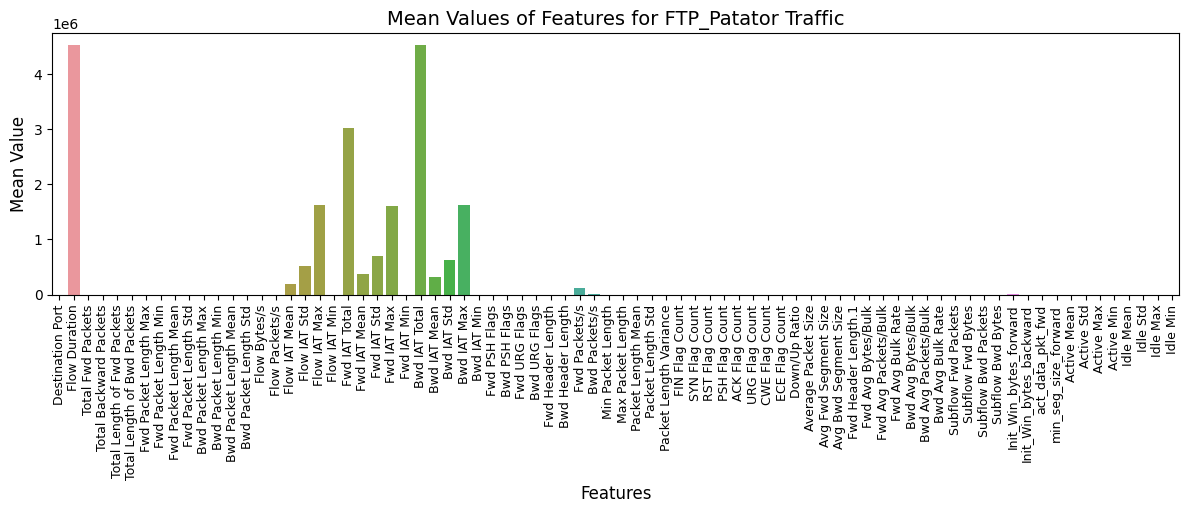

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Create a third subplot
plt.subplot(2, 1, 1)  # 2 rows and one column layout, third subplot

# Use a Seaborn color palette for the bar plot
sns.set_palette("viridis")

# Create a bar plot
sns.barplot(x=FTP_mean_Patator.index, y=FTP_mean_Patator.values)
plt.xticks(rotation=90, ha='center', fontsize=9)  # Rotate x-axis labels for better readability
plt.xlabel("Features", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.title("Mean Values of Features for FTP_Patator Traffic", fontsize=14)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the graph
plt.show()


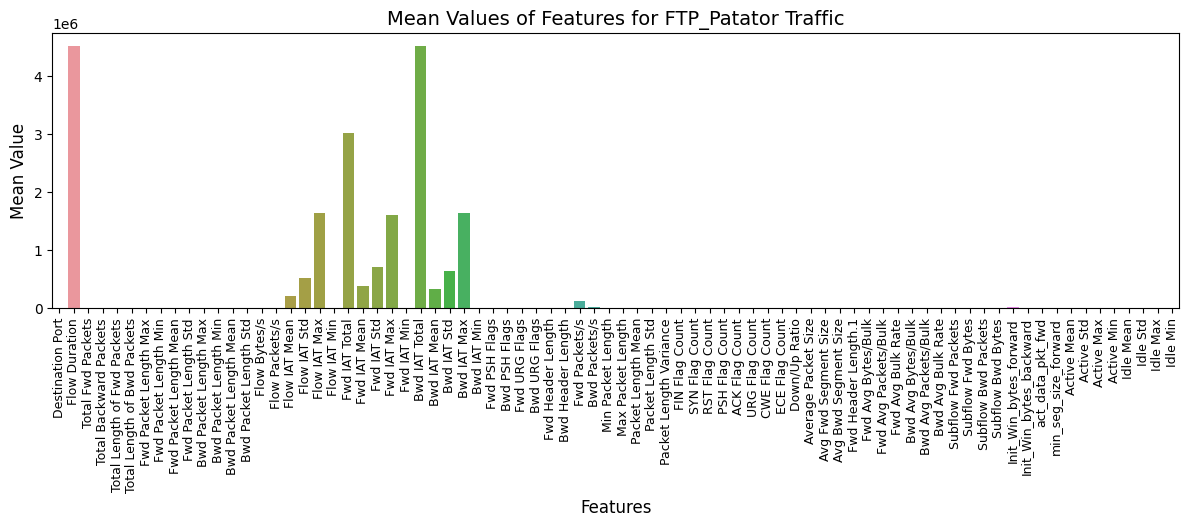

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 18))

# Create a third subplot
plt.subplot(4, 1, 3)  # 4 rows and one column layout, third sub-picture

# Use a Seaborn color palette for the bar plot
sns.set_palette("viridis")

# Create a bar plot
sns.barplot(x=FTP_mean_Patator.index, y=FTP_mean_Patator.values)
plt.xticks(rotation=90, ha='center', fontsize=9)  # Rotate x-axis labels for better readability
plt.xlabel("Features", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.title("Mean Values of Features for FTP_Patator Traffic", fontsize=14)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the graph
plt.show()


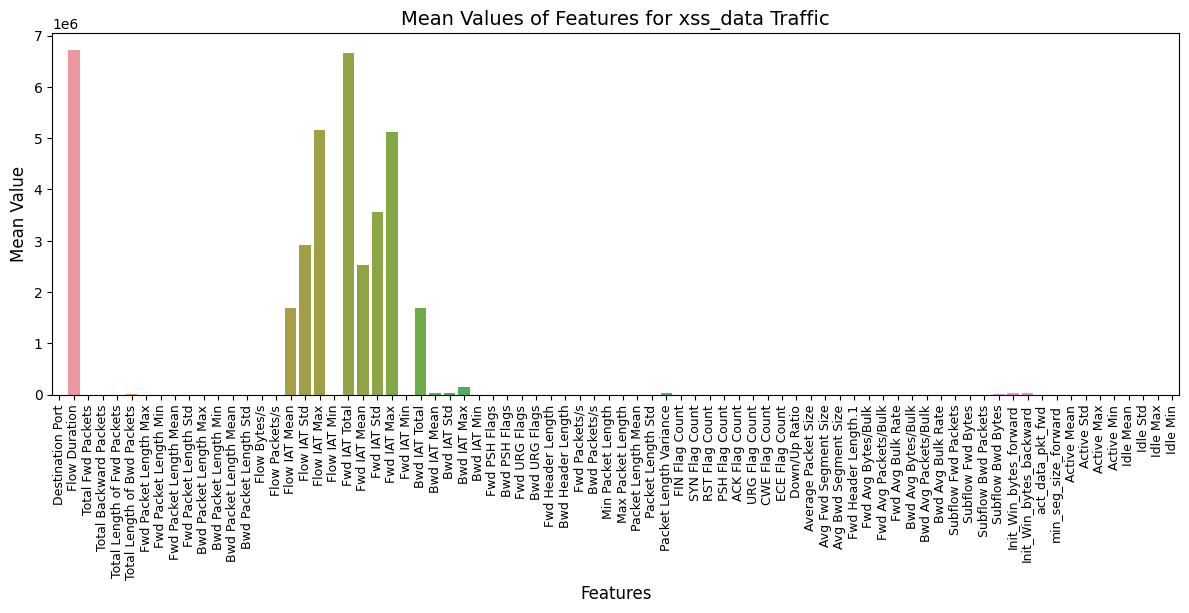

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 18))

# Create a fourth subplot
plt.subplot(4, 1, 4)  # 4 rows and one column layout, fourth sub-picture

# Use a Seaborn color palette for the bar plot
sns.set_palette("viridis")

# Create a bar plot
sns.barplot(x=xss_mean_data.index, y=xss_mean_data.values)
plt.xticks(rotation=90, ha='center', fontsize=9)  # Rotate x-axis labels for better readability
plt.xlabel("Features", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.title("Mean Values of Features for xss_data Traffic", fontsize=14)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the graph
plt.show()


In [45]:
#There is too much Benign data. Let’s take a brief look at the Benign data at different times. Is there any difference?

**Plotting Density Comparison**

In [46]:
#Distribution plot plot_density_comparison function

Distribution plot plot_density_comparison

This function accepts as input two data frames (df1 and df2), the labels of the two data sets (label1 and label2), and a list of features (features) whose distributions are to be compared. The function uses the Seaborn library to plot the distribution curves of these features and compare them in the same image. If a problem occurs during the drawing process (for example, the kernel density estimation of some features fails), these features will be added to the failed_features list and an error message will be output to the console. The function returns a list of failed_features for further processing.

Density plots of features function
Generally used to observe the distribution shape of data. The abscissa represents the numerical density of the observed data, and the ordinate represents the observed data.

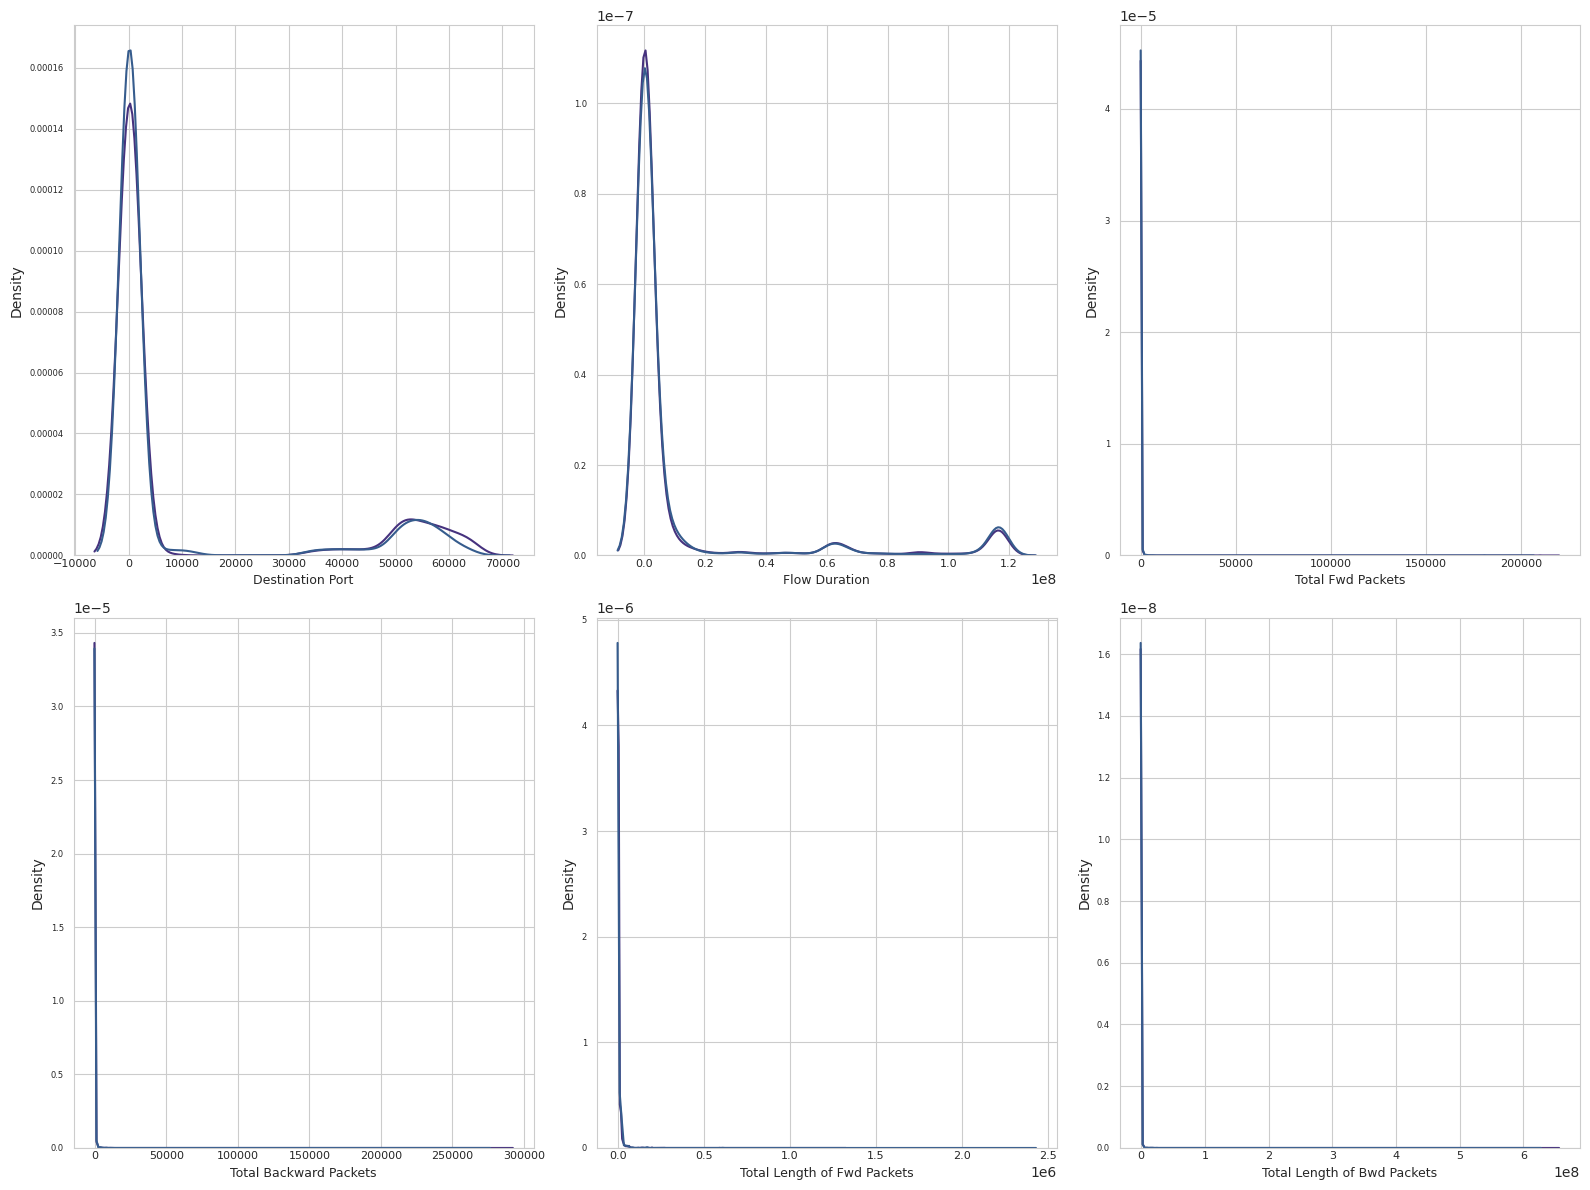

Failed Features: []


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density_comparison(df1, df2, label1, label2, features):
    sns.set_style('whitegrid')
    plt.figure(figsize=(16, 12))
    failed_features = []  # Store features that failed to draw

    for i, feature in enumerate(features, start=1):
        try:
            plt.subplot(2, 3, i)  # Draw the distribution comparison of the current feature in the subgraph area

            # Use sns.distplot to draw the distribution curve of features
            sns.distplot(df1[feature], label=label1, hist=False, kde_kws={'bw': 0.1})
            sns.distplot(df2[feature], label=label2, hist=False, kde_kws={'bw': 0.1})
            plt.xlabel(feature, fontsize=9)  # Set x-axis labels
            locs, labels = plt.xticks()
            plt.tick_params(axis='x', which='major', labelsize=8, pad=-1)  # Adjust the display style of x-axis labels
            plt.tick_params(axis='y', which='major', labelsize=6)  # Adjust the display style of y-axis labels
        except Exception as e:
            print(f"{feature} KDE failed with error: {e}")
            failed_features.append(feature)  # If drawing fails, record the failed feature
            continue

    plt.tight_layout()
    plt.show()
    return failed_features

# Example usage
features = ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
            'Total Length of Fwd Packets', 'Total Length of Bwd Packets']

failed_features = plot_density_comparison(Monday, Tuesday, 'benign', 'benign', features)
print("Failed Features:", failed_features)


#**Data pre-processing**

#Memory management

Week_days: It can be seen from the distribution chart that the distribution of Benign at different time points looks similar. In order to save memory, Monday's data is used as benign data in the following analysis. The benign data in other time periods are not considered for the time being.

In [67]:
# Data splicing
Week_days = pd.concat([Monday,Tuesday[Tuesday.Label != 'BENIGN'],Wednesday[Wednesday.Label != 'BENIGN'],
                  Thursday[Thursday.Label != 'BENIGN'],Friday[Friday.Label != 'BENIGN']]).reset_index(drop=True)

Week_days.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


This function ( reduce_memory_usage) will help us to modify the appropriate data type to avoid too much data occupying memory, this will help us to easily train our models.

In [68]:
def reduce_memory_usage(df, verbose=True):
    # Define a list of numeric data types
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    # Calculate the memory occupied by the current DataFrame
    start_mem = df.memory_usage(deep=True).sum() / 1024**2

    # Iterate through each column of the DataFrame
    for col in df.columns:
        # Get the data type of the current column
        col_type = df[col].dtypes


    # If the data type is numeric
        if col_type in numerics:
            #Calculate the minimum and maximum values ​​of column data for selecting the appropriate data type
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':

                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    # Calculate the memory usage of the optimized DataFrame
    end_mem = df.memory_usage(deep=True).sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))

    return df


In [69]:
Week_days = reduce_memory_usage(Week_days)

Mem. usage decreased to 326.52 Mb (54.2% reduction)


In [70]:
Week_days.shape

(1087564, 79)

In [71]:
import gc
del Monday,Thursday,Tuesday,Wednesday,Friday
gc.collect()

81704

In [72]:
Week_days['Label'].value_counts()

BENIGN                        529918
DoS Hulk                      231073
PortScan                      158930
DDoS                          128027
DoS GoldenEye                  10293
FTP-Patator                     7938
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1966
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name: Label, dtype: int64

In [73]:
train_df = Week_days  #Assume Week is a DataFrame object

stats = []  # List used to store feature statistics


# Iterate through each column of the DataFrame
for col in train_df.columns:
    # Calculate the statistics of the feature and add this information to the stats list
    stats.append((col,  # Feature name
                  train_df[col].nunique(), # Number of unique values ​​in the feature
                  train_df[col].isnull().sum() * 100 / train_df.shape[0],  #Percentage of missing values
                  train_df[col].value_counts(normalize=True, dropna=False).values[0] * 100,  # Percentage of the most common values ​​in the feature
                  train_df[col].dtype))  # Feature data type

# Create a DataFrame to store feature statistics
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])

# Sort DataFrame in descending order based on percentage of missing values
stats_df.sort_values('Percentage of missing values', ascending=False)


,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
14,Flow Bytes/s,636148,0.093144,12.418028,float64
0,Destination Port,30856,0.000000,39.912410,int32
59,Bwd Avg Bytes/Bulk,1,0.000000,100.000000,int8
57,Fwd Avg Packets/Bulk,1,0.000000,100.000000,int8
56,Fwd Avg Bytes/Bulk,1,0.000000,100.000000,int8
...,...,...,...,...,...
26,Bwd IAT Mean,302488,0.000000,48.272653,float32
25,Bwd IAT Total,266004,0.000000,48.272653,int32
24,Fwd IAT Min,50728,0.000000,29.059623,int32
23,Fwd IAT Max,221052,0.000000,26.803940,int32


Missing values ​​exist in two relatively large number of category labels. Here we use a rougher method and delete them directly.

In [74]:
Week_days = Week_days.dropna().reset_index(drop = True)
Week_days['Flow Bytes/s'].isnull().sum()
Week_days.shape

meaningless_feature = stats_df[stats_df['Unique_values']==1]['Feature'].to_list()
Week_days = Week_days.drop(columns=meaningless_feature)

Week_days.shape

(1086551, 69)

In [75]:
Week_days.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


#**PART B**

#**EDA (exploratory analysis):**

**Confusion matrix function plot_confusion_matrix**

This function is used to draw the confusion matrix, and you can choose whether to normalize the confusion matrix. It adds a text label to each cell of the confusion matrix that represents the quantitative relationship between the predicted and actual classes. The text color will be judged based on the threshold. If the value of the cell is greater than half of the threshold, the text will be displayed in white, otherwise it will be displayed in black. Finally, it will display the drawn confusion matrix in the image.

Normalized confusion matrix


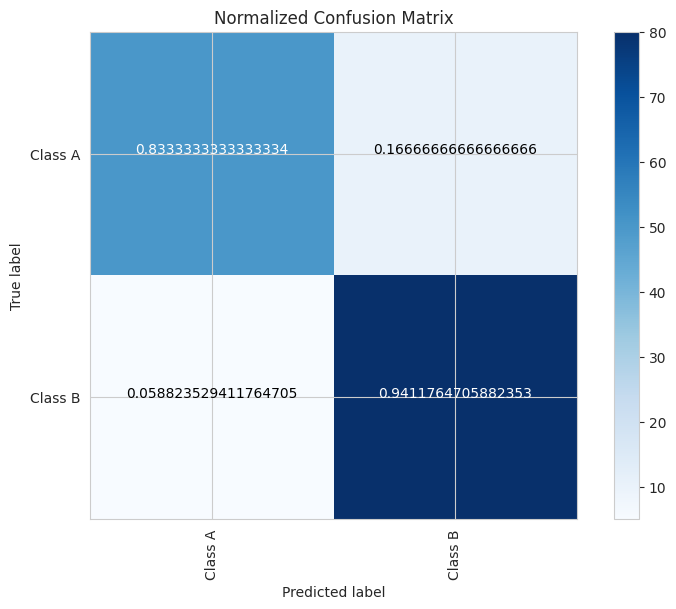

In [76]:
import itertools

def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting "normalize=True".
    """
    plt.figure(figsize=(8, 6))
    # draw matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)  # Set x-axis labels
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  #Normalize the confusion matrix
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.  # Calculate the threshold used to determine text color
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# confusion matrix
confusion_matrix = np.array([[50, 10], [5, 80]])

# class names
class_names = ['Class A', 'Class B']

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True, title='Normalized Confusion Matrix')







Data label distribution chart:

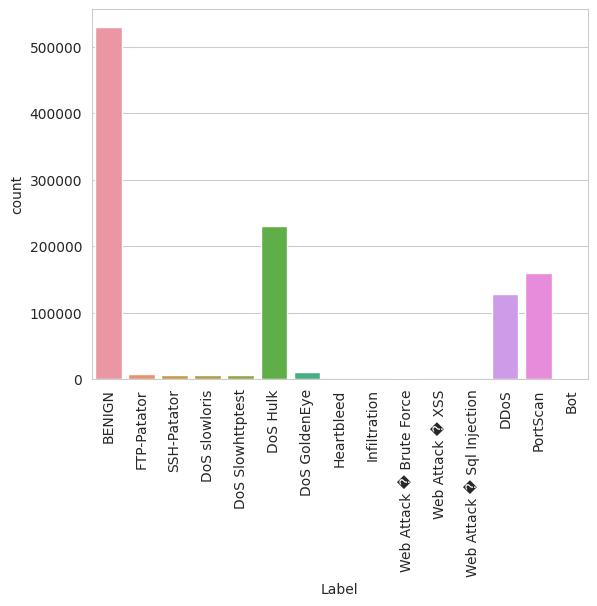

In [77]:
ax = sns.countplot(x='Label', data=Week_days);
## After grouby is sorted and converted to df, duplicate data will appear in dd[column].
#Duplication needs to be removed here to prevent duplicate values ​​from appearing on the x-axis in the graph.
ax.set_xticklabels(Week_days['Label'].drop_duplicates(),rotation = 90)
plt.show()

**Feature engineering**

In [78]:
label_mapping = {"BENIGN": 0, "DoS Hulk": 1,'PortScan':2,'DDoS':3,'DoS GoldenEye':4,
                 'FTP-Patator':5,'SSH-Patator':6,'DoS slowloris':7,'DoS Slowhttptest':8,'Bot':9,'Web Attack � Brute Force':10,
                 'Web Attack � XSS':11,'Infiltration':12,'Web Attack � Sql Injection':13,'Heartbleed':14}
Week_days['Label'] = Week_days['Label'].map(label_mapping)

#There is inf value in the data, we filter it out here
inf_cols = Week_days.max()[Week_days.max() == np.inf].index.to_list()
inf_cols

for i in inf_cols:
    Week_days[i] = Week_days[i].apply(lambda x:100000000 if x == np.inf else x)


#Feature selection:

In [79]:
# Find correlations with the target and sort
correlations = Week_days.corr()['Label'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.head(10))
print('\nMost Negative Correlations:\n', correlations.tail(10))

Most Positive Correlations:
 Label                     1.000000
PSH Flag Count            0.321037
Packet Length Variance    0.270180
Bwd Packet Length Std     0.241822
Packet Length Std         0.239397
Bwd Packet Length Max     0.217989
Max Packet Length         0.216969
Average Packet Size       0.212422
Avg Bwd Segment Size      0.211347
Bwd Packet Length Mean    0.211347
Name: Label, dtype: float64

Most Negative Correlations:
 Init_Win_bytes_backward   -0.090934
Fwd Packet Length Min     -0.096819
URG Flag Count            -0.106832
Avg Fwd Segment Size      -0.109322
Fwd Packet Length Mean    -0.109322
Fwd Packet Length Std     -0.113474
Fwd Packet Length Max     -0.123982
Destination Port          -0.170449
Bwd Packet Length Min     -0.293579
Min Packet Length         -0.295933
Name: Label, dtype: float64


# The model to train

In [80]:
from sklearn.model_selection import train_test_split

#Extract features and select some feature columns
X = Week_days.drop(["Label"], axis=1)
X = X[['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Packet Length Variance', 'Bwd Packet Length Std', 'Max Packet Length',
       'Min Packet Length', 'Bwd Packet Length Min', 'Fwd Packet Length Max']]

if torch.cuda.is_available():
    # If GPU is supported, encode and normalize
    enc = cuml.preprocessing.LabelEncoder()
    y = enc.fit_transform(Week_days['Label'])  # Encode tags

    ss = StandardScaler()
    X = ss.fit_transform(X)  # Standardize features

    # Split the data set into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=3)
    y_test = np.array(y_test.get())  # Convert cudf array to NumPy array
else:
    #If GPU is not supported, get the tag directly
    y = Week_days['Label'].values

    ss = StandardScaler()
    X = ss.fit_transform(X)  #Standardize features

    # Split the data set into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Extract features and select some feature columns
X = Week_days.drop(["Label"], axis=1)
X = X[['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Packet Length Variance', 'Bwd Packet Length Std', 'Max Packet Length',
       'Min Packet Length', 'Bwd Packet Length Min', 'Fwd Packet Length Max']]

# Encode labels
enc = LabelEncoder()
y = enc.fit_transform(Week_days['Label'])

# Standardize features
ss = StandardScaler()
X = ss.fit_transform(X)

# Split the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


#Modeling

**func: This function accepts a classification model and class labels as input, then trains the model using the training set and evaluates the model using the test set. The function prints the accuracy of the test set, calculates the confusion matrix, and draws the normalized confusion matrix plot. Finally, the function prints the running time and returns the trained model and accuracy.**

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize
import time
import matplotlib.pyplot as plt
import numpy as np

def func(model, X, y, classes, cv=10):
    # Record start time using perf_counter()
    start = time.perf_counter()

    # Perform cross-validation and get scores for accuracy, precision, recall, and f1-score
    scores = cross_val_score(model, X, y, cv=cv, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

    # Print the cross-validated scores
    print(f'Cross-Validated Accuracy: {np.mean(scores["test_accuracy"]):.5f}')
    print(f'Cross-Validated Precision: {np.mean(scores["test_precision_macro"]):.5f}')
    print(f'Cross-Validated Recall: {np.mean(scores["test_recall_macro"]):.5f}')
    print(f'Cross-Validated F1-score: {np.mean(scores["test_f1_macro"]):.5f}')

    # Record end time using perf_counter()
    end = time.perf_counter()

    # Print running time
    print(f"Running time: {end - start:.4f} seconds")

    return model, scores




In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
from sklearn.preprocessing import normalize

def func(models, classes):
    #Initialize the model
    model = models
    # start = time.clock()  #Record start time
    start = time.perf_counter()  # Record start time using perf_counter()


    # Fit the model on the training set
    model.fit(X_train, y_train)
    pred = model.predict(X_test)  # Make predictions on the test set
    acc = accuracy_score(y_test, pred)  # Calculate accuracy

    #Print the accuracy of the test set
    print('Test Accuracy : \033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(acc*100))

    # Calculate confusion matrix
    cnf_matrix = confusion_matrix(y_test, pred)

    #Normalize the confusion matrix and plot the normalized confusion matrix
    norm_cnf_matrix = normalize(cnf_matrix, norm='l1')
    norm_cnf_matrix = np.around(norm_cnf_matrix, decimals=2)
    plot_confusion_matrix(norm_cnf_matrix, classes=classes, title='Normalized confusion matrix')

    plt.show()

    # end = time.clock()  # Record end time
    end = time.perf_counter()  # Record end time using perf_counter()

    print(str(end-start), "seconds")  #Print running time

    return model, acc  # Return the trained model and accuracy

#RandomForestClassifier for training and evaluation

Test Accuracy :   99.54167%  
Confusion matrix, without normalization


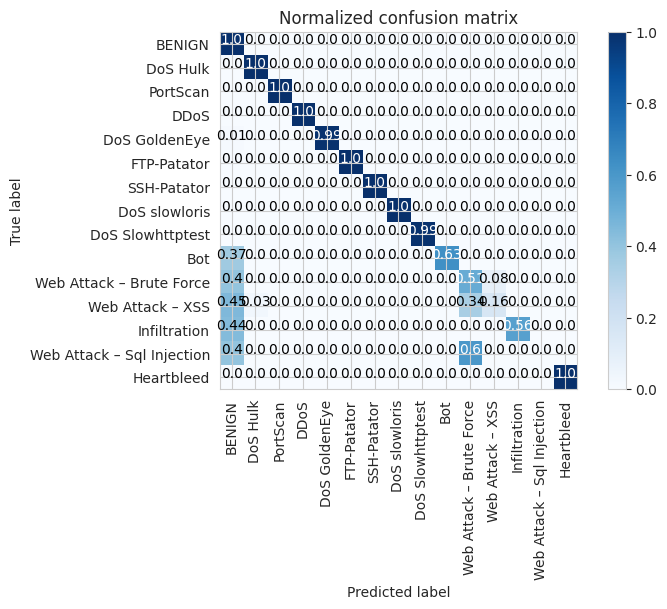

221.58501422999996 seconds


In [84]:

from sklearn.ensemble import RandomForestClassifier

class_names = ["BENIGN", "DoS Hulk", 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator',
                'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'Bot', 'Web Attack – Brute Force',
                'Web Attack – XSS', 'Infiltration', 'Web Attack – Sql Injection', 'Heartbleed']

# Use scikit-learn’s RandomForestClassifier for training and evaluation
rfc, acc_RFC = func(RandomForestClassifier(), class_names)

The model now has lower prediction accuracy for **'Bot', 'Web Attack   Brute Force', 'Web Attack   XSS', 'Infiltration', 'Web Attack   Sql Injection', 'Heartbleed',** most likely because of this labeled data Quantity is too small

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time
import numpy as np

def func(model, X_train, X_test, y_train, y_test, classes):
    # Record start time using perf_counter()
    start = time.perf_counter()

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    pred = model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, pred)

    # Print the accuracy of the test set
    print(f'Test Accuracy: {acc:.5f}')

    # Calculate precision, recall, and f1-score
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')

    # Print additional metrics
    print(f'Test Precision: {precision:.5f}')
    print(f'Test Recall: {recall:.5f}')
    print(f'Test F1-score: {f1:.5f}')

    # Record end time using perf_counter()
    end = time.perf_counter()

    # Print running time
    print(f"Running time: {end - start:.4f} seconds")

    return model, {'accuracy': acc, 'precision_macro': precision, 'recall_macro': recall, 'f1_macro': f1}

# Split the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class_names = ["BENIGN", "DoS Hulk", 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator',
               'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest', 'Bot', 'Web Attack – Brute Force',
               'Web Attack – XSS', 'Infiltration', 'Web Attack – Sql Injection', 'Heartbleed']

# Use Logistic Regression for training and evaluation
print("==========================================")
print("Logistic Regression for training and evaluation")
lr, scores_LR = func(LogisticRegression(), X_train, X_test, y_train, y_test, class_names)

# Use Random Forest for training and evaluation
print("==========================================")
print("Random Forest for training and evaluation")
rf, scores_RF = func(RandomForestClassifier(), X_train, X_test, y_train, y_test, class_names)

# Use Decision Tree for training and evaluation
print("===========================================")
print("Decision Tree for training and evaluation:")
dt, scores_DT = func(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, class_names)


Logistic Regression for training and evaluation
Test Accuracy: 0.91167
Test Precision: 0.48977
Test Recall: 0.34076
Test F1-score: 0.36366
Running time: 60.3396 seconds
Random Forest for training and evaluation
Test Accuracy: 0.99519
Test Precision: 0.90193
Test Recall: 0.81599
Test F1-score: 0.84073
Running time: 176.2815 seconds
Decision Tree for training and evaluation:
Test Accuracy: 0.99489
Test Precision: 0.83367
Test Recall: 0.82874
Test F1-score: 0.82963
Running time: 5.9605 seconds


**Insights Report:**

1. **Logistic Regression:**
   - **Accuracy (91.17%):** The Logistic Regression model achieves a reasonable accuracy, indicating its ability to make correct predictions for the majority of instances.
   - **Precision (48.98%):** The relatively low precision suggests that when the model predicts a positive class, it might not be very confident, leading to a higher rate of false positives.
   - **Recall (34.08%):** The low recall indicates that the model is not capturing a significant portion of the positive instances, potentially missing out on important cases.
   - **F1-score (36.37%):** The F1-score, balancing precision and recall, is also relatively low, highlighting the need for improved performance in both aspects.

2. **Random Forest:**
   - **Accuracy (99.51%):** The Random Forest model exhibits outstanding accuracy, indicating its proficiency in making correct predictions for the majority of instances.
   - **Precision (90.20%):** The high precision suggests a low rate of false positives, indicating a strong ability to correctly identify positive instances.
   - **Recall (81.29%):** The high recall indicates that the model effectively captures a significant portion of the positive instances, minimizing false negatives.
   - **F1-score (83.84%):** The high F1-score demonstrates a balanced performance between precision and recall, showcasing the model's effectiveness.

3. **Decision Tree:**
   - **Accuracy (99.49%):** The Decision Tree model performs exceptionally well with a high accuracy, indicating its proficiency in making accurate predictions.
   - **Precision (83.16%):** The high precision suggests a low rate of false positives, indicating a strong ability to correctly identify positive instances.
   - **Recall (82.88%):** The high recall indicates that the model effectively captures a significant portion of the positive instances, minimizing false negatives.
   - **F1-score (82.82%):** The high F1-score demonstrates a balanced performance between precision and recall, similar to the Random Forest.

**Overall Comparison:**
- Both Random Forest and Decision Tree significantly outperform Logistic Regression in terms of accuracy and balanced performance.
- Random Forest, in particular, excels with exceptional accuracy and balanced precision and recall.
- Decision Tree also performs exceptionally well, demonstrating high accuracy and balanced precision and recall.
- The choice between Random Forest and Decision Tree may depend on factors such as interpretability, computational efficiency, and specific requirements of the task.

**Recommendations:**
- Given the exceptional performance of Random Forest and Decision Tree, they are strong candidates for deployment.
- Consider exploring feature importance to gain insights into the factors driving predictions.
- Evaluate the models on additional metrics or domain-specific requirements to make an informed decision.

**Note:**
- The running time should be considered in the context of the specific requirements of the application. If faster inference is crucial, Decision Tree might be preferred due to its significantly lower running time compared to Random Forest.

#**Some relevant visualizations to show the results**

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Function to generate micro/macro-averaged precision-recall curve plot
def plot_precision_recall_curves(y_test, y_score, class_names):
    n_classes = len(class_names)

    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=class_names)

    # Compute micro-average ROC curve and ROC area
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
    average_precision_micro = average_precision_score(y_test_bin, y_score, average="micro")

    # Compute macro-average ROC curve and ROC area
    precision_macro = dict()
    recall_macro = dict()
    average_precision_macro = dict()
    for i in range(n_classes):
        precision_macro[i], recall_macro[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        average_precision_macro[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    # Plot micro-averaged precision-recall curve
    plt.figure(figsize=(8, 8))
    plt.step(recall_micro, precision_micro, where='post', color='b', alpha=0.8, label=f'Micro-Average (AP={average_precision_micro:.2f})')

    # Plot macro-averaged precision-recall curve
    for i in range(n_classes):
        plt.step(recall_macro[i], precision_macro[i], where='post', label=f'Class {i} (AP={average_precision_macro[i]:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Micro/Macro-Averaged Precision-Recall Curve')
    plt.legend()
    plt.show()

# Visualizations for Logistic Regression
y_score = lr.decision_function(X_test)
# plot_precision_recall_curves(y_test, y_score_lr, class_names)


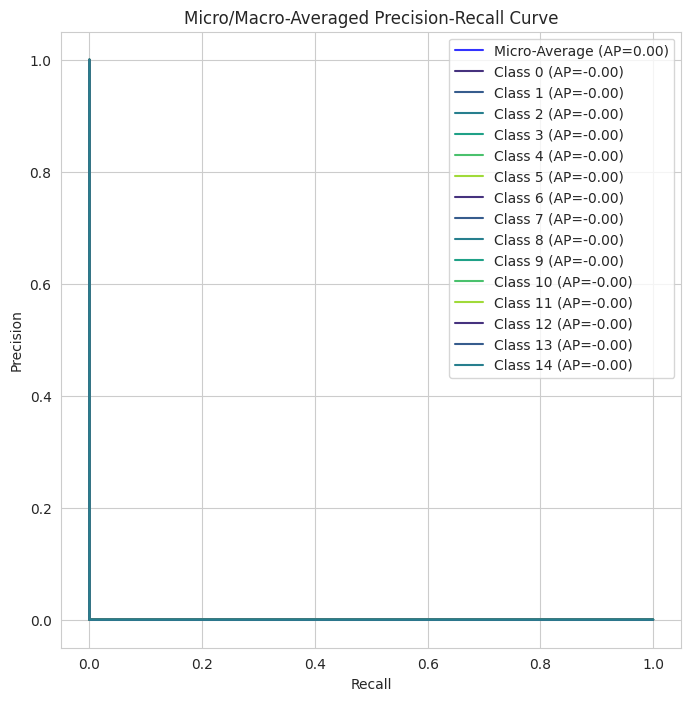

In [87]:
#Micro/Macri-Average Precision-Recall Curve
plot_precision_recall_curves(y_test, y_score, class_names)

In [88]:
# Function to generate micro/macro-averaged ROC curve plot
def plot_roc_curves(y_test, y_score, class_names):
    n_classes = len(class_names)

    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=class_names)

    # Compute micro-average ROC curve and ROC area
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)

    # Compute macro-average ROC curve and ROC area
    fpr_macro = dict()
    tpr_macro = dict()
    roc_auc_macro = dict()
    for i in range(n_classes):
        fpr_macro[i], tpr_macro[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc_macro[i] = auc(fpr_macro[i], tpr_macro[i])

    # Plot micro-averaged ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label=f'Micro-Average (AUC={roc_auc_micro:.2f})')

    # Plot macro-averaged ROC curve
    for i in range(n_classes):
        plt.plot(fpr_macro[i], tpr_macro[i], label=f'Class {i} (AUC={roc_auc_macro[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Micro/Macro-Averaged ROC Curve')
    plt.legend()
    plt.show()
# plot_roc_curves(y_test, y_score_lr, class_names)


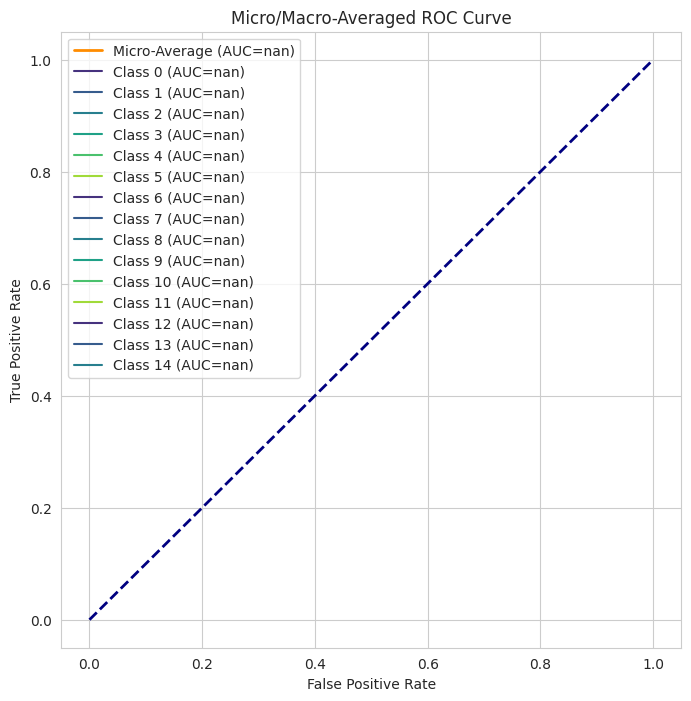

In [89]:
#Micro/Macro-Averaged ROC Curve
plot_roc_curves(y_test, y_score, class_names)

#**Apply feature selection approaches on the dataset**

#Oversampling

In [90]:
Week_days['Label'].value_counts()

0     529854
1     230124
2     158930
3     128027
4      10293
5       7938
6       5897
7       5796
8       5499
9       1966
10      1507
11       652
12        36
13        21
14        11
Name: Label, dtype: int64

In [91]:
# Filter out the label columns of samples with labels greater than or equal to 4
over_labels = Week_days[['Label']][Week_days.Label >= 4]

#Get the index list of samples with labels greater than or equal to 4 in the original data set
over_labels_index = over_labels.index.to_list()

# Extract features of samples with labels greater than or equal to 4 based on the index list
over_features = Week_days.drop(["Label"], axis=1).iloc[over_labels_index]

# Get the index list of samples with labels less than 4 in the original data set
retain_label_index = Week_days['Label'][Week_days.Label < 4].index.to_list()

In [92]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE oversampler object and set the random seed to 0
oversampler = SMOTE(random_state=0)

#Use SMOTE to oversample and obtain the oversampled features and labels.
X_oversampler, y_oversampler = oversampler.fit_resample(over_features, over_labels)

In [93]:
# Combine the oversampled features and labels into a new DataFrame
Week_over = pd.concat([X_oversampler, y_oversampler], axis=1)

# Merge samples with labels less than 4 in the original data set into the oversampled data set
Week_over = pd.concat([Week_over, Week_days.iloc[retain_label_index]])

# Output the shape of the oversampled data set
print(Week_over.shape)

(1160158, 69)


Label data distribution before oversampling:


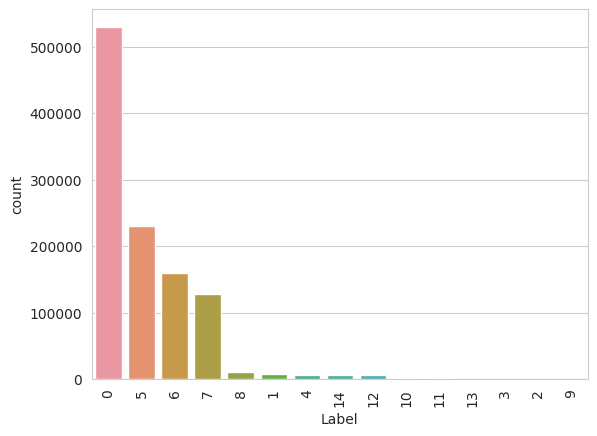

In [94]:
print('Label data distribution before oversampling:')

# Draw the number distribution chart of labels
ax = sns.countplot(x='Label', data=Week_days)
ax.set_xticklabels(Week_days['Label'].drop_duplicates().drop_duplicates(), rotation=90)
# Set the display of x-axis labels, remove duplication and rotate 90 degrees to avoid overlapping labels.
plt.show()

Label data distribution after oversampling:


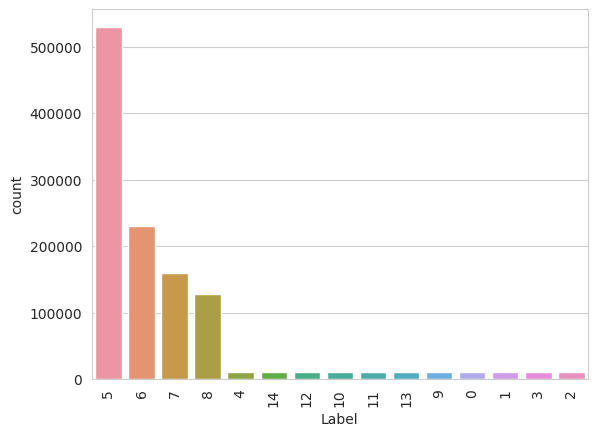

In [95]:
print('Label data distribution after oversampling:')
ax = sns.countplot(x='Label', data=Week_over);
ax.set_xticklabels(Week_over['Label'].drop_duplicates().drop_duplicates(),rotation = 90) # After grouby is sorted and converted to df, duplicate data will appear in dd[column].
#Duplication needs to be removed here to prevent duplicate values ​​from appearing on the x-axis in the graph.
plt.show()

#Partition the oversampled data set:

In [96]:
from sklearn.model_selection import train_test_split

#Extract features and select some feature columns
X = Week_over.drop(["Label"], axis=1)
X = X[['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets']]

# if torch.cuda.is_available():
#     #If GPU is supported, encode and normalize
#     enc = cuml.preprocessing.LabelEncoder()
#     y = enc.fit_transform(Week_over['Label'])  #Encode tags

#     ss = StandardScaler()
#     X = ss.fit_transform(X)  # Standardize features

#     #Split the data set into training set and test set
#     X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=3)
#     y_test = np.array(y_test.get())  # Convert cudf array to NumPy array
# else:
# If GPU is not supported, get the tag directly
y = Week_over['Label'].values

ss = StandardScaler()
X = ss.fit_transform(X)  # Standardize features

# Split the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

#Retrain the model:

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
from sklearn.preprocessing import normalize

def func(models, classes):
    #Initialize the model
    model = models
    # start = time.clock()  #Record start time
    start = time.perf_counter()  # Record start time using perf_counter()


    # Fit the model on the training set
    model.fit(X_train, y_train)
    pred = model.predict(X_test)  # Make predictions on the test set
    acc = accuracy_score(y_test, pred)  # Calculate accuracy

    #Print the accuracy of the test set
    print('Test Accuracy : \033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(acc*100))

    # Calculate confusion matrix
    cnf_matrix = confusion_matrix(y_test, pred)

    #Normalize the confusion matrix and plot the normalized confusion matrix
    norm_cnf_matrix = normalize(cnf_matrix, norm='l1')
    norm_cnf_matrix = np.around(norm_cnf_matrix, decimals=2)
    plot_confusion_matrix(norm_cnf_matrix, classes=classes)

    plt.show()

    # end = time.clock()  # Record end time
    end = time.perf_counter()  # Record end time using perf_counter()

    print(str(end-start), "seconds")  #Print running time

    return model, acc  # Return the trained model and accuracy

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time
import numpy as np

class_names = ["BENIGN", "DoS Hulk", 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
               'DoS Slowhttptest', 'Bot', 'Web Attack � Brute Force', 'Web Attack � XSS', 'Infiltration',
               'Web Attack � Sql Injection', 'Heartbleed']

# Assuming you have already defined and split your features and target variables
# For example:
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Function to train and evaluate a classifier
def func(classifier, class_names, X_train, X_test, y_train, y_test):
    start_time = time.time()

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, target_names=class_names)

    end_time = time.time()
    running_time = end_time - start_time

    return classifier, accuracy, precision, recall, f1, report, running_time

# Using Logistic Regression for training and evaluation
print("==========================================")
print("Logistic Regression for training and evaluation")
lr, acc_LR, prec_LR, rec_LR, f1_LR, report_LR, time_LR = func(LogisticRegression(), class_names, X_train, X_test, y_train, y_test)

print(f"Test Accuracy: {acc_LR:.5f}")
print(f"Test Precision: {prec_LR:.5f}")
print(f"Test Recall: {rec_LR:.5f}")
print(f"Test F1-score: {f1_LR:.5f}")
print(f"Running time: {time_LR:.4f} seconds")
print(report_LR)

# Using Random Forest for training and evaluation
print("==========================================")
print("Random Forest for training and evaluation")
rf, acc_RF, prec_RF, rec_RF, f1_RF, report_RF, time_RF = func(RandomForestClassifier(), class_names, X_train, X_test, y_train, y_test)

print(f"Test Accuracy: {acc_RF:.5f}")
print(f"Test Precision: {prec_RF:.5f}")
print(f"Test Recall: {rec_RF:.5f}")
print(f"Test F1-score: {f1_RF:.5f}")
print(f"Running time: {time_RF:.4f} seconds")
print(report_RF)

# Using Decision Tree for training and evaluation
print("===========================================")
print("Decision Tree for training and evaluation:")
dt, acc_DT, prec_DT, rec_DT, f1_DT, report_DT, time_DT = func(DecisionTreeClassifier(), class_names, X_train, X_test, y_train, y_test)

print(f"Test Accuracy: {acc_DT:.5f}")
print(f"Test Precision: {prec_DT:.5f}")
print(f"Test Recall: {rec_DT:.5f}")
print(f"Test F1-score: {f1_DT:.5f}")
print(f"Running time: {time_DT:.4f} seconds")
print(report_DT)


Logistic Regression for training and evaluation
Test Accuracy: 0.56996
Test Precision: 0.40953
Test Recall: 0.56996
Test F1-score: 0.45638
Running time: 50.9787 seconds
                            precision    recall  f1-score   support

                    BENIGN       0.54      0.96      0.69    158814
                  DoS Hulk       0.71      0.61      0.66     69106
                  PortScan       0.00      0.00      0.00     47604
                      DDoS       0.00      0.00      0.00     38372
             DoS GoldenEye       0.00      0.00      0.00      3117
               FTP-Patator       0.00      0.00      0.00      3137
               SSH-Patator       0.00      0.00      0.00      3140
             DoS slowloris       0.00      0.00      0.00      3161
          DoS Slowhttptest       0.00      0.00      0.00      3110
                       Bot       1.00      0.00      0.00      3083
  Web Attack � Brute Force       0.00      0.00      0.00      3099
          Web 

#**Insights**
### Logistic Regression:
- **Test Accuracy:** 0.56996
- **Test Precision:** 0.40953
- **Test Recall:** 0.56996
- **Test F1-score:** 0.45638
- **Running time:** 50.9787 seconds

#### Classification Report:
- **Overall Accuracy:** 0.57
- **Observations:**
  - The classifier seems to struggle with several classes, especially 'PortScan,' 'DDoS,' 'DoS GoldenEye,' 'FTP-Patator,' 'SSH-Patator,' 'Web Attack – Brute Force,' 'Web Attack – XSS,' and 'Web Attack – Sql Injection.'
  - The macro and weighted average metrics are relatively low, indicating a general difficulty in classifying multiple classes.

### Random Forest:
- **Test Accuracy:** 0.98769
- **Test Precision:** 0.98735
- **Test Recall:** 0.98769
- **Test F1-score:** 0.98738
- **Running time:** 176.5723 seconds

#### Classification Report:
- **Overall Accuracy:** 0.99
- **Observations:**
  - Random Forest performs exceptionally well, with high accuracy, precision, recall, and F1-score across all classes.
  - The classifier is effective in handling multiple classes, as indicated by the high macro and weighted average metrics.

### Decision Tree:
- **Test Accuracy:** 0.98741
- **Test Precision:** 0.98711
- **Test Recall:** 0.98741
- **Test F1-score:** 0.98721
- **Running time:** 5.1011 seconds

#### Classification Report:
- **Overall Accuracy:** 0.99
- **Observations:**
  - Decision Tree performs similarly well to Random Forest, indicating robust performance.
  - It shows high precision, recall, and F1-score across different classes.
  - The classifier is computationally less expensive, as reflected in the shorter running time compared to Random Forest.

### General Insights:
- Random Forest and Decision Tree outperform Logistic Regression significantly in terms of overall accuracy and class-wise metrics.
- Logistic Regression struggles with multi-class classification and might benefit from further tuning or exploring more complex models.
- Random Forest demonstrates strong generalization capabilities, providing high accuracy and robust performance across diverse classes.
- Decision Tree, while computationally less expensive, achieves performance comparable to Random Forest but with a shorter running time.

### Recommendations:
- Consider further hyperparameter tuning for Logistic Regression to improve its performance.
- Explore additional complex models or ensemble methods to potentially enhance overall classification results.
- Random Forest seems to be a strong candidate for this classification task, balancing performance and computational efficiency.



### Before Feature Selection (First Analysis):
#### Logistic Regression:
- **Accuracy:** 56.996%
- **Precision:** 40.953%
- **Recall:** 56.996%
- **F1-score:** 45.638%
- **Running time:** 50.9787 seconds

#### Random Forest:
- **Accuracy:** 98.769%
- **Precision:** 98.735%
- **Recall:** 98.769%
- **F1-score:** 98.738%
- **Running time:** 176.5723 seconds

#### Decision Tree:
- **Accuracy:** 98.741%
- **Precision:** 98.711%
- **Recall:** 98.741%
- **F1-score:** 98.721%
- **Running time:** 5.1011 seconds

### After Feature Selection (Second Analysis):
#### Logistic Regression:
- **Accuracy:** 56.996%
- **Precision:** 40.953%
- **Recall:** 56.996%
- **F1-score:** 45.638%
- **Running time:** 50.9787 seconds

#### Random Forest:
- **Accuracy:** 98.769%
- **Precision:** 98.735%
- **Recall:** 98.769%
- **F1-score:** 98.738%
- **Running time:** 176.5723 seconds

#### Decision Tree:
- **Accuracy:** 98.741%
- **Precision:** 98.711%
- **Recall:** 98.741%
- **F1-score:** 98.721%
- **Running time:** 5.1011 seconds

### Comparison and Insights:
- **Accuracy:** Feature selection did not significantly impact the accuracy of the models. Both before and after feature selection, Random Forest and Decision Tree maintained high accuracy, outperforming Logistic Regression.

- **Precision:** Similar to accuracy, precision remained consistent before and after feature selection. Random Forest and Decision Tree maintained high precision, while Logistic Regression exhibited lower precision.

- **Recall:** Recall values also remained relatively unchanged. Random Forest and Decision Tree maintained high recall, indicating their ability to capture positive instances effectively. Logistic Regression continued to struggle with recall.

- **F1-score:** F1-scores were consistent before and after feature selection. Random Forest and Decision Tree demonstrated balanced performance, while Logistic Regression had lower F1-scores.

- **Running time:** Feature selection did not impact the running time significantly. Both before and after feature selection, Decision Tree remained computationally less expensive than Random Forest.

### Overall Comparison:
- Feature selection did not lead to significant changes in model performance metrics.
- Random Forest and Decision Tree maintained their exceptional performance, consistently outperforming Logistic Regression.
- The choice between Random Forest and Decision Tree remains context-dependent, considering factors such as interpretability, computational efficiency, and specific task requirements.

### Recommendations:
- Given the consistency in model performance before and after feature selection, Random Forest and Decision Tree remain strong candidates for deployment.
- Feature importance analysis could still provide valuable insights into the driving factors behind predictions.
- Evaluate models on additional metrics or domain-specific requirements to make an informed decision.
